<a href="https://colab.research.google.com/github/anishrashinkar-26/BML/blob/main/EXP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age  AnnualIncome_k$  SpendingScore
0   56             62.5          100.0
1   69             35.0           73.8
2   46             98.9           27.8
3   32             56.9          100.0
4   60             41.9          100.0
inertia: 101.72721475048726
silhouette: 0.4344057959694028
cluster centers (scaled):
[[-0.17327475  0.9258701 ]
 [-1.19247403 -0.81495581]
 [ 1.58980667 -1.39999391]
 [ 0.7018595  -0.11288676]]


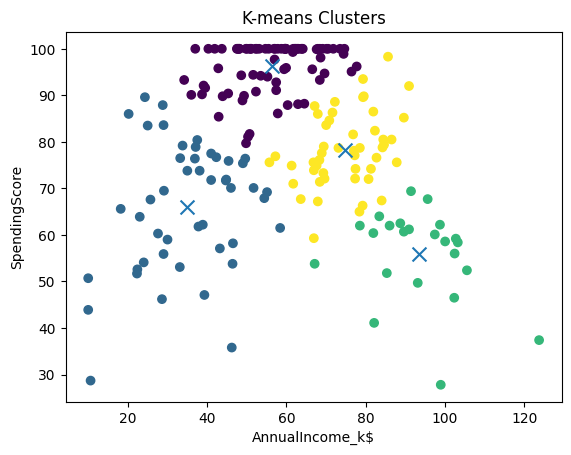

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 200
age = np.random.randint(18, 70, n)
income = np.random.normal(60, 20, n).clip(10, 150)
spending_score = (100 - np.abs(income - 60) + np.random.normal(0,15,n)).clip(1,100)
data = pd.DataFrame({'Age': age, 'AnnualIncome_k$': np.round(income,1), 'SpendingScore': np.round(spending_score,1)})
print(data.head())

X = data[['AnnualIncome_k rupees', 'SpendingScore']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)
data['Cluster'] = labels
print("inertia:", kmeans.inertia_)
print("silhouette:", silhouette_score(X_scaled, labels))
print("cluster centers (scaled):")
print(kmeans.cluster_centers_)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:,0], scaler.inverse_transform(kmeans.cluster_centers_)[:,1], marker='x', s=100)
plt.xlabel('AnnualIncome_k$')
plt.ylabel('SpendingScore')
plt.title('K-means Clusters')
plt.show()
